<a href="https://colab.research.google.com/github/AashRoxx/Data_science_projects/blob/main/Natural_language_processing/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns 

In [ ]:
data_train=pd.read_csv("Test.csv")

In [ ]:
data_train.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [ ]:
print(data_train.shape)

(5000, 2)


In [ ]:
print(data_train['label'].value_counts())

1    2505
0    2495
Name: label, dtype: int64


In [ ]:
def convert_lowercase(column):
    column = column.str.lower()
    return column

In [ ]:
#lowering text
print(f"Before applying lower casing: {data_train['text'][0][:15]}")

lower = convert_lowercase(data_train['text'])

print(f"After applying lower casing : {lower[0][:15]}")

Before applying lower casing: I always wrote 
After applying lower casing : i always wrote 


In [ ]:
#removing html tags
import re
def remove_html_tags(text):
    re_html = re.compile('<.*?>')
    return re_html.sub(r'', text)

In [ ]:
print(f"Before removing HTML tags: {data_train['text'][1][:70]}")
html_gone = lower.apply(remove_html_tags)
print(f"After removing HTML tags : {html_gone[1][:70]}")

Before removing HTML tags: 1st watched 12/7/2002 - 3 out of 10(Dir-Steve Purcell): Typical Mary K
After removing HTML tags : 1st watched 12/7/2002 - 3 out of 10(dir-steve purcell): typical mary k


In [ ]:
#removing url
def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

In [ ]:
print(f"Before removing HTML tags: {data_train['text'][1][:70]}")
url_gone = html_gone.apply(remove_url)
print(f"After removing HTML tags : {url_gone[1][:70]}")

Before removing HTML tags: 1st watched 12/7/2002 - 3 out of 10(Dir-Steve Purcell): Typical Mary K
After removing HTML tags : 1st watched 12/7/2002 - 3 out of 10(dir-steve purcell): typical mary k


In [ ]:
#removing punctuation
import string
exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

In [ ]:
print(f"Before removing punctuation: {data_train['text'][1][:70]}")
punc_gone = url_gone.apply(remove_punc)
print(f"After removing punctuation : {punc_gone[1][:70]}")

Before removing punctuation: 1st watched 12/7/2002 - 3 out of 10(Dir-Steve Purcell): Typical Mary K
After removing punctuation : 1st watched 1272002  3 out of 10dirsteve purcell typical mary kate  as


In [ ]:
#removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_english = stopwords.words('english')

def remove_stopwords(text):
    new_text = []
    for word in text.split():
        if word in stopwords_english:
            continue
        else:
            new_text.append(word)

    return ' '.join(new_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(f"Before removing stopwords: {data_train['text'][1][:70]}")
sw_gone = punc_gone.apply(remove_stopwords)
print(f"After removing stopwords : {sw_gone[1][:]}")

Before removing stopwords: 1st watched 12/7/2002 - 3 out of 10(Dir-Steve Purcell): Typical Mary K
After removing stopwords : 1st watched 1272002 3 10dirsteve purcell typical mary kate ashley fare kisses looks like girls getting pretty tired stuff interesting happens ever decide split go ways episode adventures interns rome fashion designer puts right mailroom learn working hard abouti guess besides typical flirtations boys nothing much else except rome scenario ¾ way movie finally revealed getting fired rehired fired rehired definetly made people dont understand corporate world shows interpretation maybe real world next adventureif one even kids didnt seem care boring adventure makebelieve lets see probably couple years till legal adults well see happens


In [ ]:
#correct spelling
from textblob import TextBlob
norm_train_reviews=data_train.text
norm_train_reviews[0]
norm_train_string=norm_train_reviews.to_string()
norm_train_spelling=TextBlob(norm_train_string)
norm_train_spelling.correct()

KeyboardInterrupt: ignored

In [ ]:
#tokenization
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer=ToktokTokenizer()
token = tokenizer.tokenize(sw_gone)
print(f"After tokenization : {token[1:70]}")

After tokenization : ['always', 'wrote', 'series', 'complete', 'stinkfest', 'jim', 'bel', '...', '1', '1st', 'watched', '1272002', '3', '10dirsteve', 'purcell', 'typic', '...', '2', 'movie', 'poorly', 'written', 'directed', 'fell', 'asleep', '30', 'm', '...', '3', 'interesting', 'thing', 'miryang', 'secret', 'sunshine', 'acto', '...', '4', 'first', 'read', 'berlin', 'meer', 'didnt', 'expect', 'much', 'thoug', '...', '...', '4995', 'kind', 'picture', 'john', 'lassiter', 'would', 'making', 'today', '...', '4996', 'must', 'see', 'saw', 'whipped', 'press', 'screening', 'hilarious', '...', '4997', 'nbc', 'ashamed', 'wouldnt', 'allow']


In [ ]:
#lementization
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in token]

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#bigrams
from nltk import ngrams
def n_gram(n):                                             
    n_grams = ngrams(words.split(), n)
    return n_grams
true_bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]

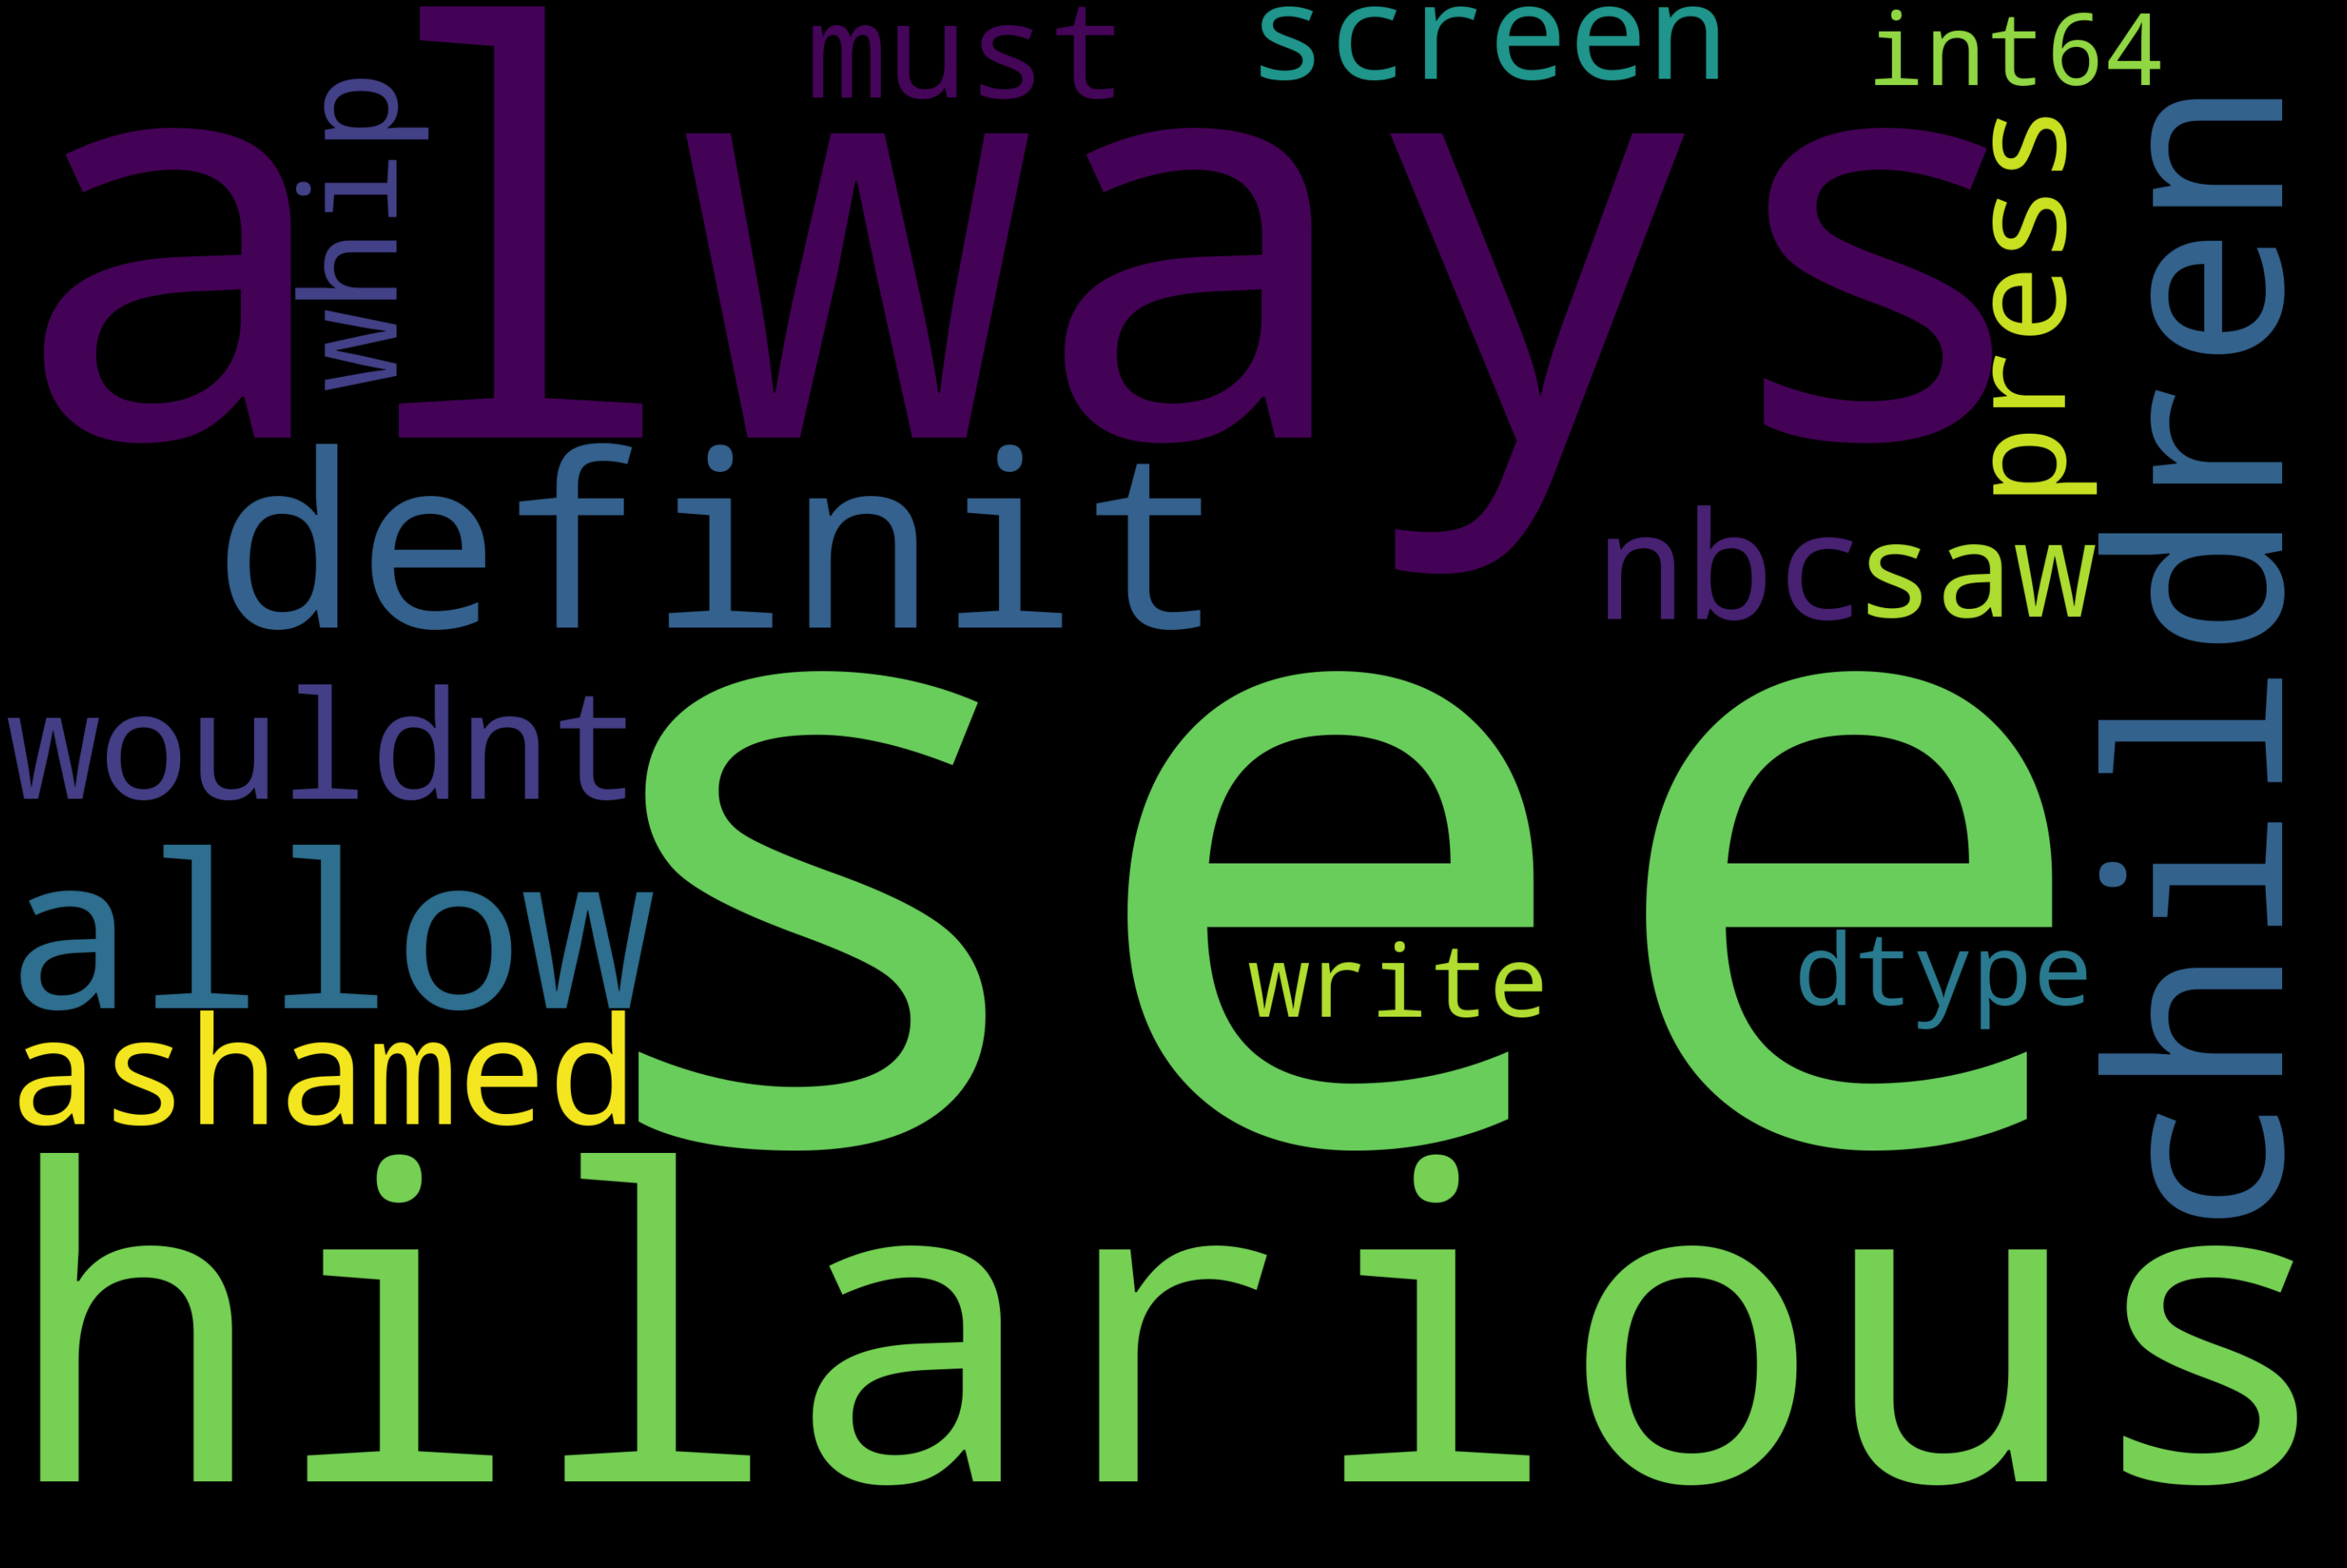

In [ ]:
#most frequent
from wordcloud import WordCloud
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black').generate(str(text))
    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

generate_word_cloud(true_bigrams_series)

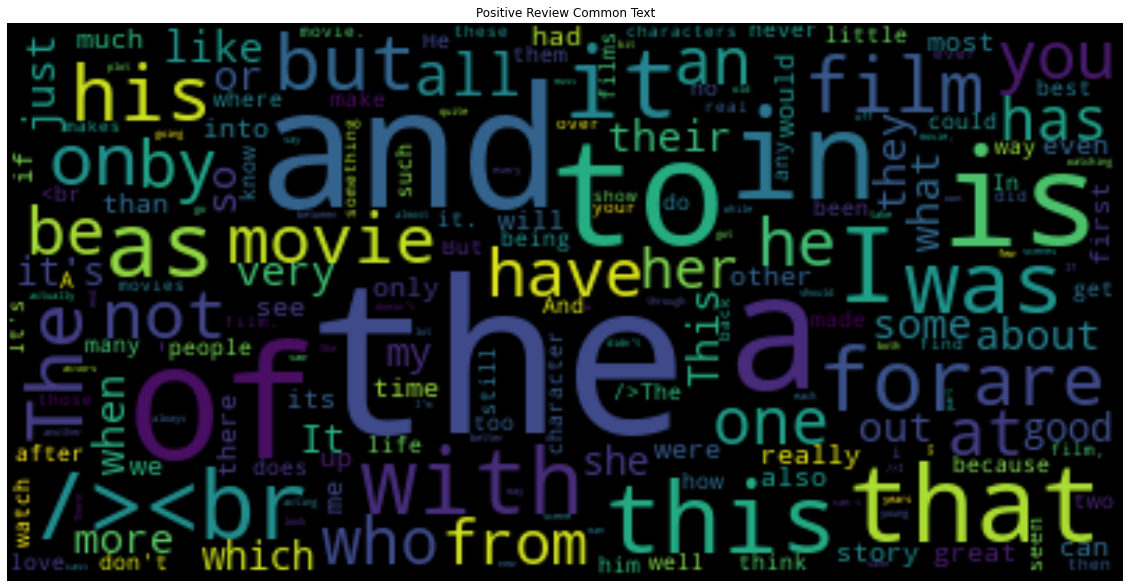

In [ ]:
from nltk import FreqDist
plt.figure(figsize=(20,20))
pos_freq = FreqDist(' '.join(data_train[data_train['label'] == 1].text).split(' '))
wc = WordCloud().generate_from_frequencies(frequencies=pos_freq)
plt.imshow(wc,interpolation='bilinear')
plt.title('Positive Review Common Text')
plt.axis('off')
plt.show()

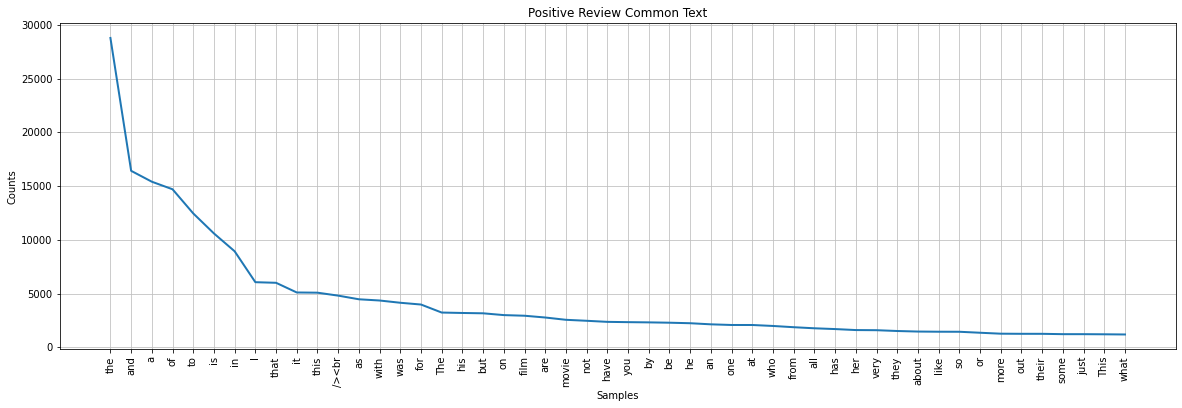

In [ ]:
plt.figure(figsize=(20,6))
pos_freq.plot(50,cumulative=False,title='Positive Review Common Text')
plt.show()

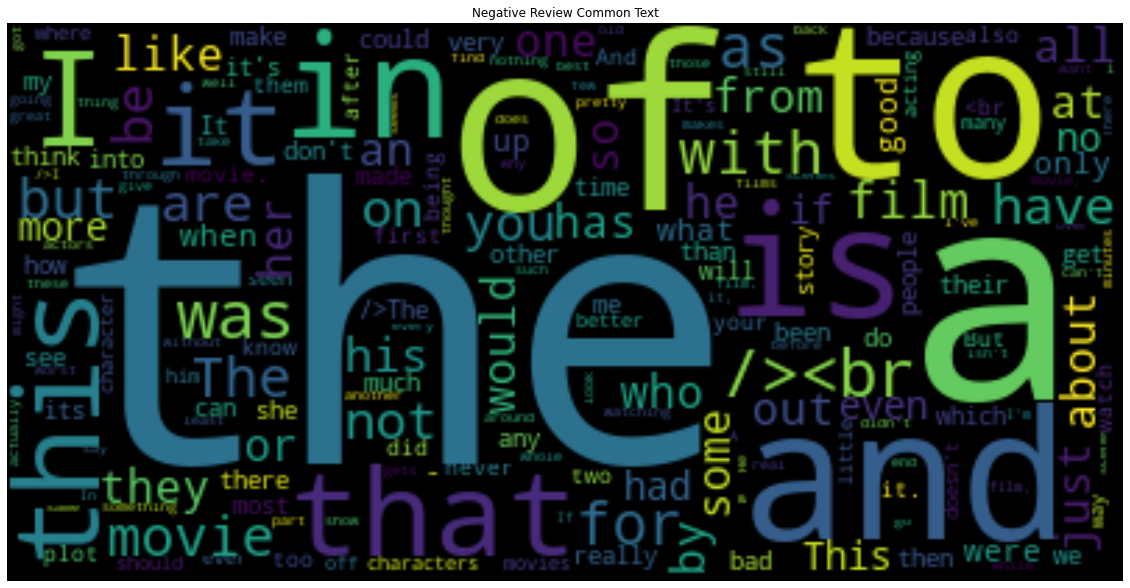

In [ ]:
plt.figure(figsize=(20,20))
neg_freq = FreqDist(' '.join(data_train[data_train['label'] == 0].text).split(' '))
wc = WordCloud().generate_from_frequencies(frequencies=neg_freq)
plt.imshow(wc,interpolation='bilinear')
plt.title('Negative Review Common Text')
plt.axis('off')
plt.show()

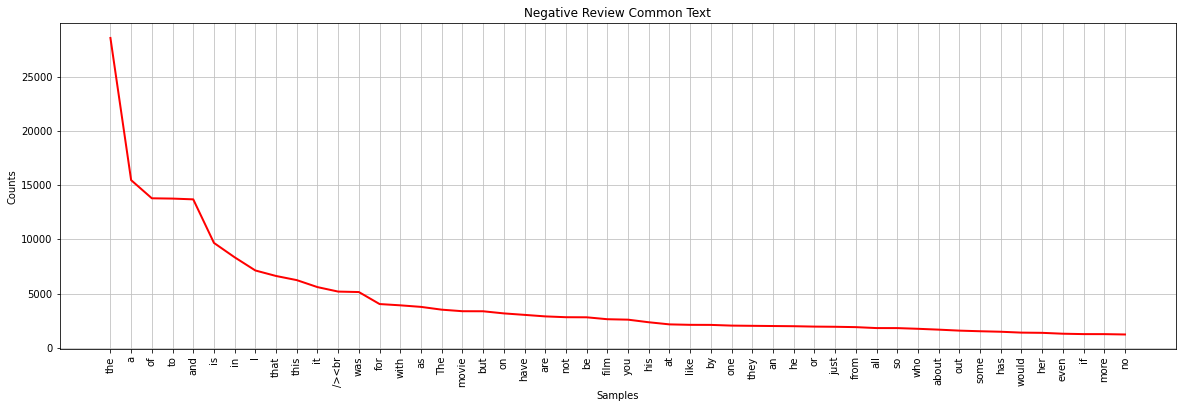

In [ ]:
plt.figure(figsize=(20,6))
neg_freq.plot(50,cumulative=False,title='Negative Review Common Text',color='red')
plt.show()



In [ ]:
size_of_vocabulary = len(words)+1
print(size_of_vocabulary)

102


In [ ]:
x_train = data_train['text']
y_train = data_train['label']
x_test = data_train['text']
y_test = data_train['label']

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#Tokenize the sentences
tokenizer = Tokenizer()
#preparing vocabulary
tokenizer.fit_on_texts(data_train['text'])
#converting text into integer sequences
x_train = tokenizer.texts_to_sequences(data_train['text'])
x_test = tokenizer.texts_to_sequences(data_train['text'])
#padding to prepare sequences of same length
x_train=pad_sequences(x_train,maxlen=120)
x_test=pad_sequences(x_train,maxlen=120)

In [ ]:
size_of_vocabulary = len(tokenizer.word_index)+1
print(size_of_vocabulary)



43602


In [ ]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
#embedding layer
model.add(Embedding(size_of_vocabulary,128,input_length=120))
#lstm layer
model.add(Bidirectional(LSTM(100,return_sequences=True,dropout=0.2)))
model.add(Bidirectional(LSTM(90,return_sequences=True,dropout=0.2)))
model.add(Bidirectional(LSTM(80,return_sequences=True,dropout=0.2)))
model.add(Bidirectional(LSTM(70,return_sequences=True,dropout=0.2)))
model.add(Bidirectional(LSTM(64,return_sequences=True,dropout=0.2)))
model.add(Bidirectional(LSTM(60,return_sequences=True,dropout=0.2)))
model.add(Bidirectional(LSTM(50,return_sequences=True,dropout=0.2)))
model.add(Bidirectional(LSTM(40,return_sequences=True,dropout=0.2)))
model.add(Bidirectional(LSTM(38,return_sequences=True,dropout=0.2)))
model.add(Bidirectional(LSTM(36,return_sequences=True,dropout=0.2)))
model.add(Bidirectional(LSTM(34,return_sequences=True,dropout=0.2)))
model.add(Bidirectional(LSTM(32,return_sequences=True,dropout=0.2)))
#Global Maxpooling
model.add(GlobalMaxPooling1D())
#Dense Layer
model.add(Dense(32,activation='relu'))
model.add(Dense(28,activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(24,activation='sigmoid'))
model.add(Dense(1,activation='relu'))
#Add loss function, metrics, optimizer
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#Adding callbacks
es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True,verbose=1)
#summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 128)          5581056   
                                                                 
 bidirectional (Bidirectiona  (None, 120, 200)         183200    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 120, 180)         209520    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 120, 160)         167040    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 120, 140)         129360    
 nal)                                                   

In [ ]:
history = model.fit(x_train,y_train,batch_size=128,epochs=5,
                    validation_data=(x_test,y_test),verbose=1,callbacks=[es,mc])

Epoch 1/5
40/40 [==============================] - ETA: 0s - loss: 7.7279 - accuracy: 0.4990
Epoch 1: val_accuracy improved from -inf to 0.49900, saving model to best_model.h5
40/40 [==============================] - 52s 425ms/step - loss: 7.7279 - accuracy: 0.4990 - val_loss: 7.7279 - val_accuracy: 0.4990
Epoch 2/5
40/40 [==============================] - ETA: 0s - loss: 7.7279 - accuracy: 0.4990
Epoch 2: val_accuracy did not improve from 0.49900
40/40 [==============================] - 9s 225ms/step - loss: 7.7279 - accuracy: 0.4990 - val_loss: 7.7279 - val_accuracy: 0.4990
Epoch 3/5
40/40 [==============================] - ETA: 0s - loss: 7.7279 - accuracy: 0.4990
Epoch 3: val_accuracy did not improve from 0.49900
40/40 [==============================] - 8s 205ms/step - loss: 7.7279 - accuracy: 0.4990 - val_loss: 7.7279 - val_accuracy: 0.4990
Epoch 4/5
40/40 [==============================] - ETA: 0s - loss: 7.7279 - accuracy: 0.4990
Epoch 4: val_accuracy did not improve from 0.4990